# Telecom Churn Case Study


The solution is divided into the following sections: 
    1. Filtering High Value Customers.
    2. Data Cleaning. 
    3. Defining Churn.
    4. Exploratory Data Analysis.
    5. Model Building and Model Evaluation.
    6. Summary.
    7. Recommendations.
    

In [1]:
#importing all the necessary libraries: 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# hide & ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Preventing column value truncation and displaying max 300 cols
pd.set_option('max_colwidth', -1, 'display.max_columns', 300) 
# Format with commas and round off to two decimal places in pandas 
pd.options.display.float_format = '{:,.2f}'.format 
# Allowing max 300 rows to be displayed
pd.set_option("display.max_rows", 300)

In [2]:
'''Commenting because encoding detection is time consuming.
#Using chardet to determine the correct encoding type
import chardet
rawdata = open('telecom_churn_data.csv', 'rb').read()
result = chardet.detect(rawdata)
result
'''

"Commenting because encoding detection is time consuming.\n#Using chardet to determine the correct encoding type\nimport chardet\nrawdata = open('telecom_churn_data.csv', 'rb').read()\nresult = chardet.detect(rawdata)\nresult\n"

In [3]:
#Importing the data file: 
telecom = pd.read_csv("telecom_churn_data.csv", encoding='ascii')
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,0.00,0.00,nan,nan,0.16,nan,nan,nan,4.13,nan,nan,nan,1.15,nan,nan,nan,5.44,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,5.44,0.00,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,na

In [4]:
telecom.shape

(99999, 226)

There are 99999 customers & 226 features to define the whether the customer is a high value customer or not & their churn predictions.

## 1. Filtering High Value Customers
We need to predict churn only for the high-value customers. High-value customers are those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase), i.e. Jun/Jul.

After filtering the high-value customers, we should get about 29.9k rows.

#### While calculating the average amount spent, we shall consider the total amount spent on Calls & average amount spent on the DATA. This is a very important step to decide the high value customers for the case study.. Alternatively , we can also define the HVC directly based on the average of the total amount spent on recharges.

In [5]:
#Finding columns with recharge info as we need to find the high value customers. 

total_rech_cols = [col for col in telecom.columns if 'total_rech_' in col]
print(total_rech_cols)

['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9']


### Derived Variables for Recharge Columns:

In [6]:
#Finding derived variables: Total recharge = Number of recharges x average recharge amount: 
telecom["total_rech_data_amt_6"] = telecom["total_rech_data_6"]  * telecom['av_rech_amt_data_6']
telecom["total_rech_data_amt_7"] = telecom["total_rech_data_7"]  * telecom['av_rech_amt_data_7']
telecom["total_rech_data_amt_8"] = telecom["total_rech_data_8"]  * telecom['av_rech_amt_data_8']
telecom["total_rech_data_amt_9"] = telecom["total_rech_data_9"]  * telecom['av_rech_amt_data_9']

In [7]:
# AS we found the representative varaible for total_recharge amount, dropping the redundant variables: 
drop_columns = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", 
                'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
telecom.drop(drop_columns, axis=1, inplace=True)

#### Finding the average of recharge amounts in Good Phase : 6th & 7th Month

In [8]:
#Average of Recharge Amount for 6th & 7th Month : Good phase : 
av_rech_amt_67 = (telecom["total_rech_amt_6"].fillna(0) + telecom["total_rech_data_amt_6"].fillna(0) + 
telecom["total_rech_amt_7"].fillna(0) + telecom["total_rech_data_amt_7"].fillna(0))/2.0

#70th Percentile of Avg Recharge Amount
pc70_67 = np.percentile(av_rech_amt_67, 70.0)
print('70th percentile of 6th & 7th months Average recharge amount: ', pc70_67)

df_hvc = telecom[av_rech_amt_67 >= pc70_67]
print('Shape of dataframe after applying filter (70th Percentile) : ', df_hvc.shape)

70th percentile of 6th & 7th months Average recharge amount:  478.0
Shape of dataframe after applying filter (70th Percentile) :  (30001, 222)


## 2. Data Cleaning & EDA


In [9]:
# dropping rows & columns which have all null values
df_hvc = df_hvc.dropna(axis = 1, how = 'all')
df_hvc = df_hvc.dropna(how='all')
df_hvc.shape

(30001, 222)

In [10]:
# deduplicating if incase the duplication exists

df_hvc.drop_duplicates (subset = None , inplace = True)
df_hvc.shape

(30001, 222)

In [11]:
#Removing columns which has only 1 unique value: 

#List of columns with only 1 unqiue value
column_list = df_hvc.loc[:,df_hvc.apply(pd.Series.nunique) == 1]
column_list.head(5)

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9
0,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,nan,nan,0.00,nan,nan,nan,0.00,nan
7,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.00,0.00,0.00,nan,0.00,0.00,0.00,nan
8,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
21,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
23,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [12]:
#Remove Columns with only 1 unique value
df_hvc = df_hvc.loc[:,df_hvc.apply(pd.Series.nunique) != 1]
df_hvc.shape

(30001, 206)

In [13]:
#Renaming columns using number of months instead of names of the months:   aug_vbc_3g jul_vbc_3g jun_vbc_3g sep_vbc_3g

df_hvc.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

In [14]:
#Check for Columns that can be changed to integers, floats or other types: 

obj_col_data = df_hvc.select_dtypes(include=['object'])
print(obj_col_data.iloc[0])

date_of_last_rech_6         6/21/2014
date_of_last_rech_7         7/16/2014
date_of_last_rech_8         8/8/2014 
date_of_last_rech_9         9/28/2014
date_of_last_rech_data_6    6/21/2014
date_of_last_rech_data_7    7/16/2014
date_of_last_rech_data_8    8/8/2014 
date_of_last_rech_data_9    NaN      
Name: 0, dtype: object


#### Drop Cols with greater than 30% of missing values

In [15]:
#Drop Columns with > 30% of missing values & not for 9th Month
columns = df_hvc.columns
perc_missing = df_hvc.isnull().sum() * 100 / len(df_hvc)
df_missing_value = pd.DataFrame({'column_name': columns,
                                 'percent_missing': perc_missing})

drop_columns = df_missing_value.loc[(df_missing_value["column_name"].str.contains('_9')==False) & (df_missing_value["percent_missing"] > 30.0)]["column_name"]
drop_columns

date_of_last_rech_data_6    date_of_last_rech_data_6
date_of_last_rech_data_7    date_of_last_rech_data_7
date_of_last_rech_data_8    date_of_last_rech_data_8
max_rech_data_6             max_rech_data_6         
max_rech_data_7             max_rech_data_7         
max_rech_data_8             max_rech_data_8         
count_rech_2g_6             count_rech_2g_6         
count_rech_2g_7             count_rech_2g_7         
count_rech_2g_8             count_rech_2g_8         
count_rech_3g_6             count_rech_3g_6         
count_rech_3g_7             count_rech_3g_7         
count_rech_3g_8             count_rech_3g_8         
arpu_3g_6                   arpu_3g_6               
arpu_3g_7                   arpu_3g_7               
arpu_3g_8                   arpu_3g_8               
arpu_2g_6                   arpu_2g_6               
arpu_2g_7                   arpu_2g_7               
arpu_2g_8                   arpu_2g_8               
night_pck_user_6            night_pck_user_6  

In [16]:
df_hvc.drop(drop_columns, axis=1, inplace=True)
df_hvc.shape

(30001, 179)

In [17]:
#Drop Rows with all Null Values
df_hvc = df_hvc.dropna(how='all',axis=0) 
df_hvc.shape

(30001, 179)

#### Drop Highly Correlated Columns

In [18]:
#Find Highly correlated data & drop Highly Correlated Columns
corr = df_hvc.corr()
corr.loc[:,:] = np.tril(corr, k=-1)
corr = corr.stack()
corr[(corr > 0.60) | (corr < -0.60)].sort_values()

monthly_3g_6      vol_3g_mb_6        0.60
total_ic_mou_7    loc_ic_t2t_mou_7   0.60
arpu_2g_9         count_rech_3g_9    0.60
total_og_mou_8    onnet_mou_9        0.60
total_rech_amt_8  arpu_6             0.60
                                     ... 
isd_og_mou_8      isd_og_mou_7       0.95
                  isd_og_mou_6       0.95
total_rech_amt_9  arpu_9             0.95
total_rech_amt_8  arpu_8             0.96
sachet_2g_9       count_rech_2g_9    0.98
Length: 337, dtype: float64

In [19]:
# removing the highly correlated columns found above: 
drop_column_list = ['loc_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2t_mou_9','std_og_t2m_mou_6',
                'std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2m_mou_9','total_og_mou_6','total_og_mou_7','total_og_mou_8',
                'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2t_mou_9','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2m_mou_9',
                'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2m_mou_9','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
                'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_amt_9','arpu_2g_9','count_rech_2g_9','count_rech_3g_9','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8',
                'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2t_mou_9','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2f_mou_9',
                'loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2m_mou_9','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_ic_t2f_mou_9',
                'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
                 
df_hvc.drop(drop_column_list, axis=1, inplace=True)
df_hvc.shape

(30001, 124)

## 3. Defining Churn

For the purpose of this case study we will take the Zero Usage on the following parameters as churn category clients. 
Parameters:
Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:
    - total_ic_mou_9
    - total_og_mou_9
    - vol_2g_mb_9
    - vol_3g_mb_9

*Note: In real life scenario we may take the drop in the avearage usage of the telecom services by the customer as an indication of him moving towards churn. Hence we may change the approach when we use this for real life examples. For deciding whether a person will churn or not based on the above parameters, we shall check whether the average usage have dropped in comparision to the 'Good Phase' ( Months 6 & 7). Hence we need to calculate the average usage of the above mentioned parameters.*

After tagging churners, we will remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).


In [20]:
df_hvc[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00
8,34.91,142.18,0.00,0.00
21,252.61,"1,031.53",0.00,0.00
23,127.48,127.63,13.93,314.74


In [21]:
#Tagging Churned customers (churn=1, else 0) 
df_hvc['churn'] = np.where(df_hvc[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1, 0)
df_hvc['churn'].head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int32

In [22]:
#Remove All 9th Month related columns
drop_columns9 = [col for col in df_hvc.columns if '_9' in col]
print(drop_columns9)

df_hvc.drop(drop_columns9, axis=1, inplace=True)

df_hvc.shape

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'max_rech_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'vbc_3g_9', 'total_rech_data_amt_9']


(30001, 87)

In [23]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDist(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 & nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 & 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [24]:
# Correlation matrix
def plotCorrMatrix(df, graphWidth):
    filename = "Telecom Churn"
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for : {filename}', fontsize=15)
    plt.show()

In [25]:
# Scatter & density plots
def plotScatMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows & columns that would make the matrix singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter & Density Plot')
    plt.show()

## 4. Exploratory Data Analysis
Distribution graphs (histogram/bar graph) of sampled columns:

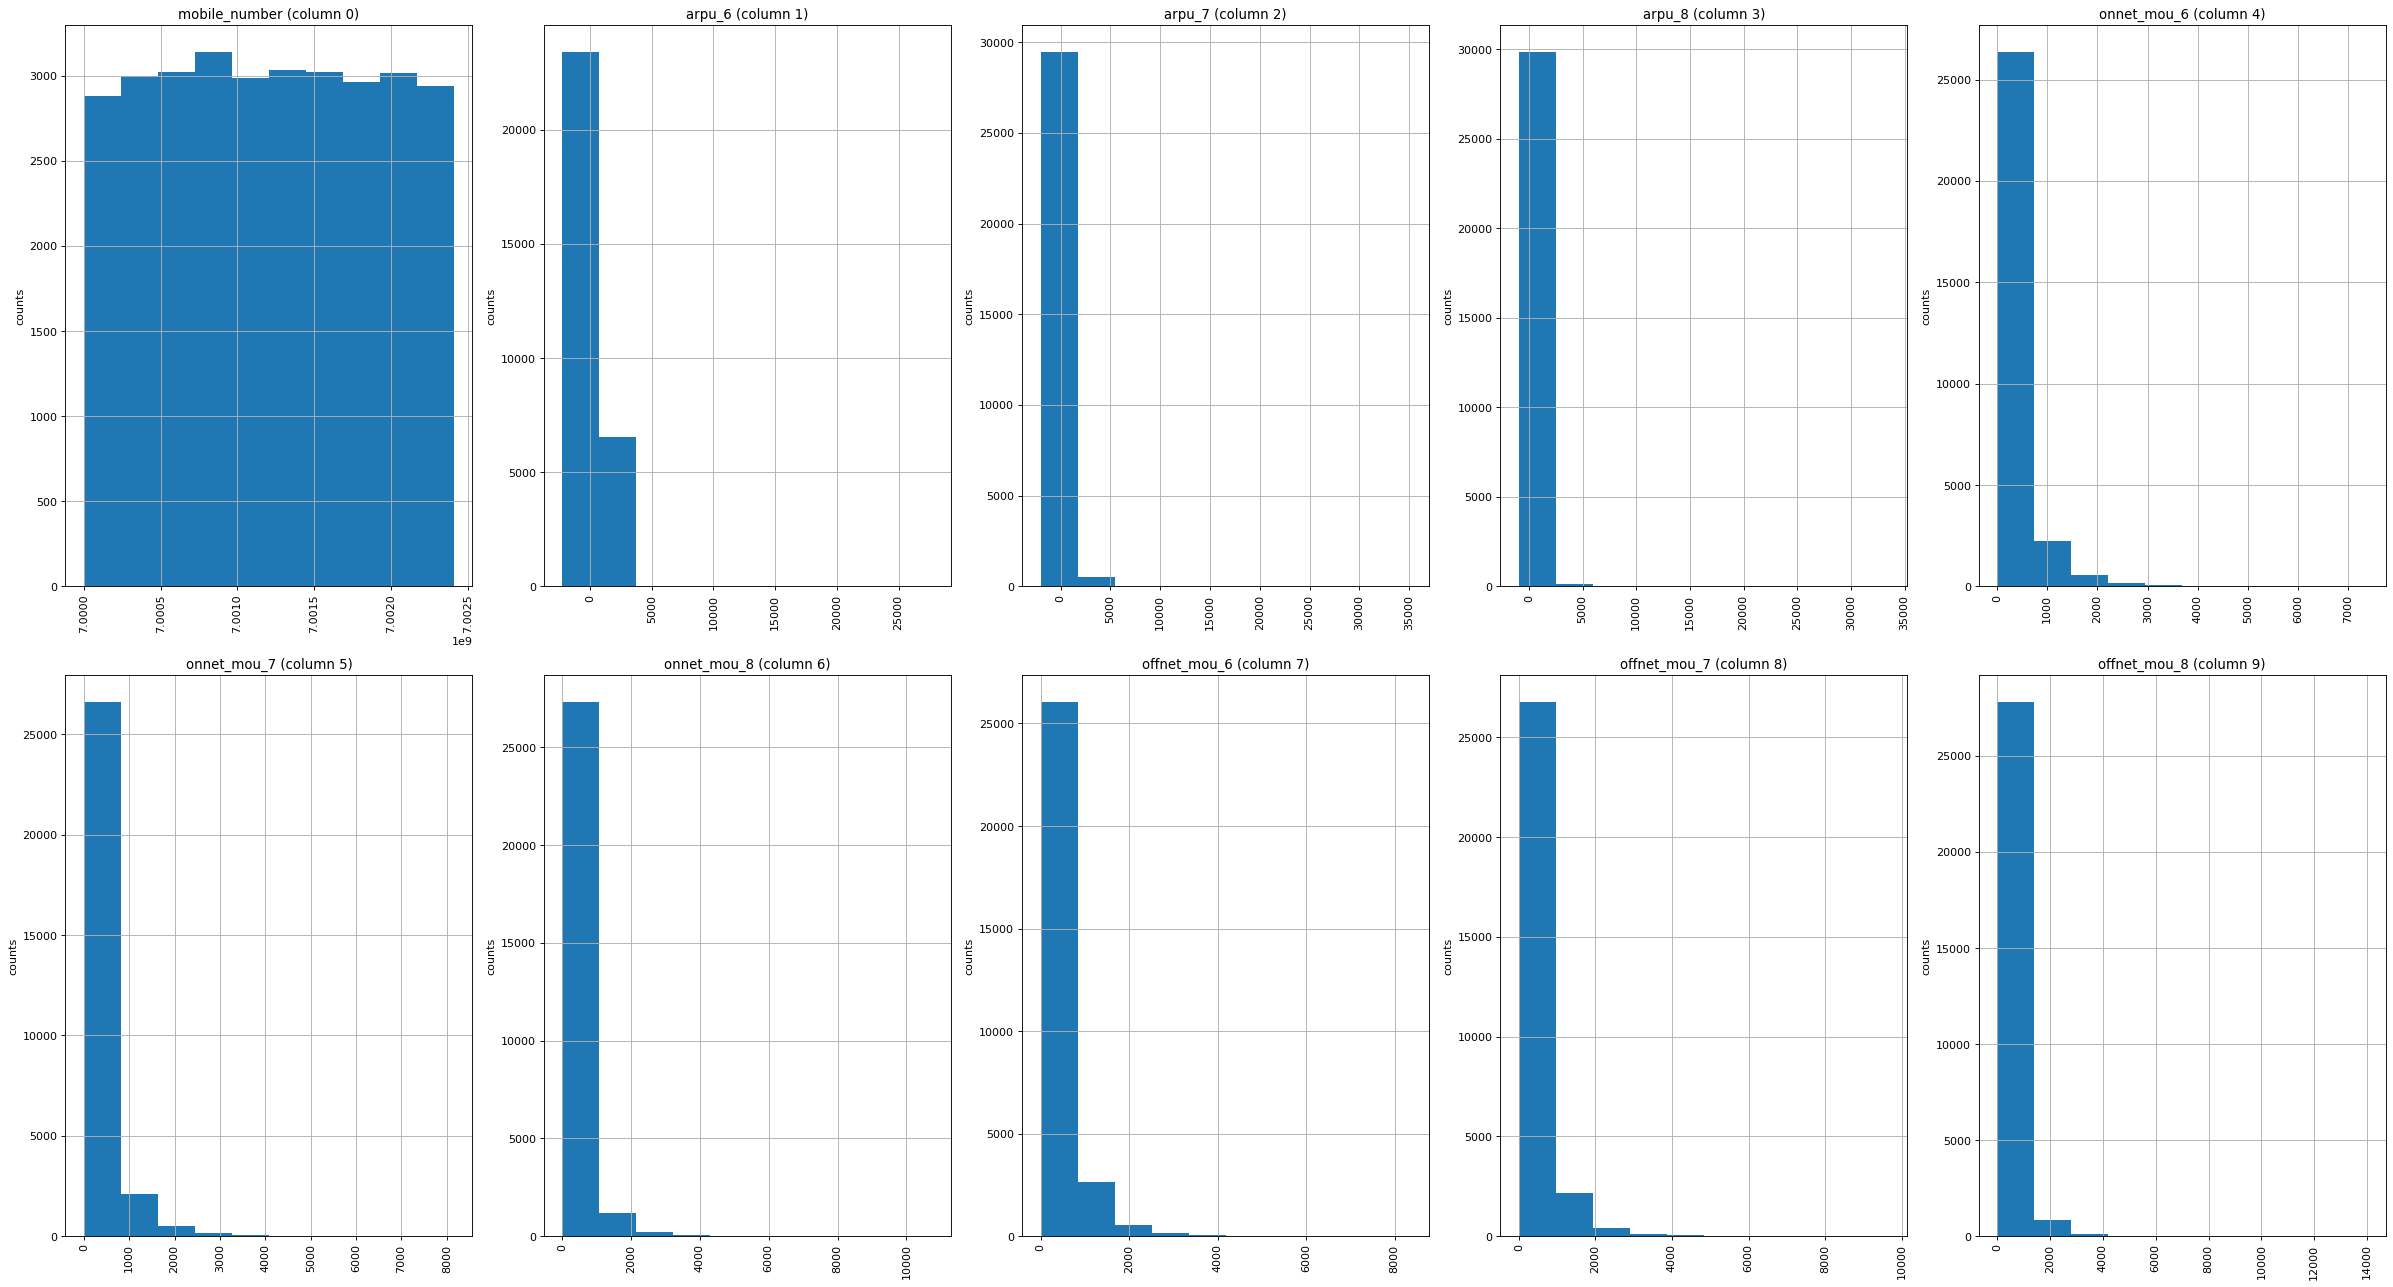

In [26]:
plotPerColumnDist(df_hvc, 10, 5)

Plotting Correlation matrix:

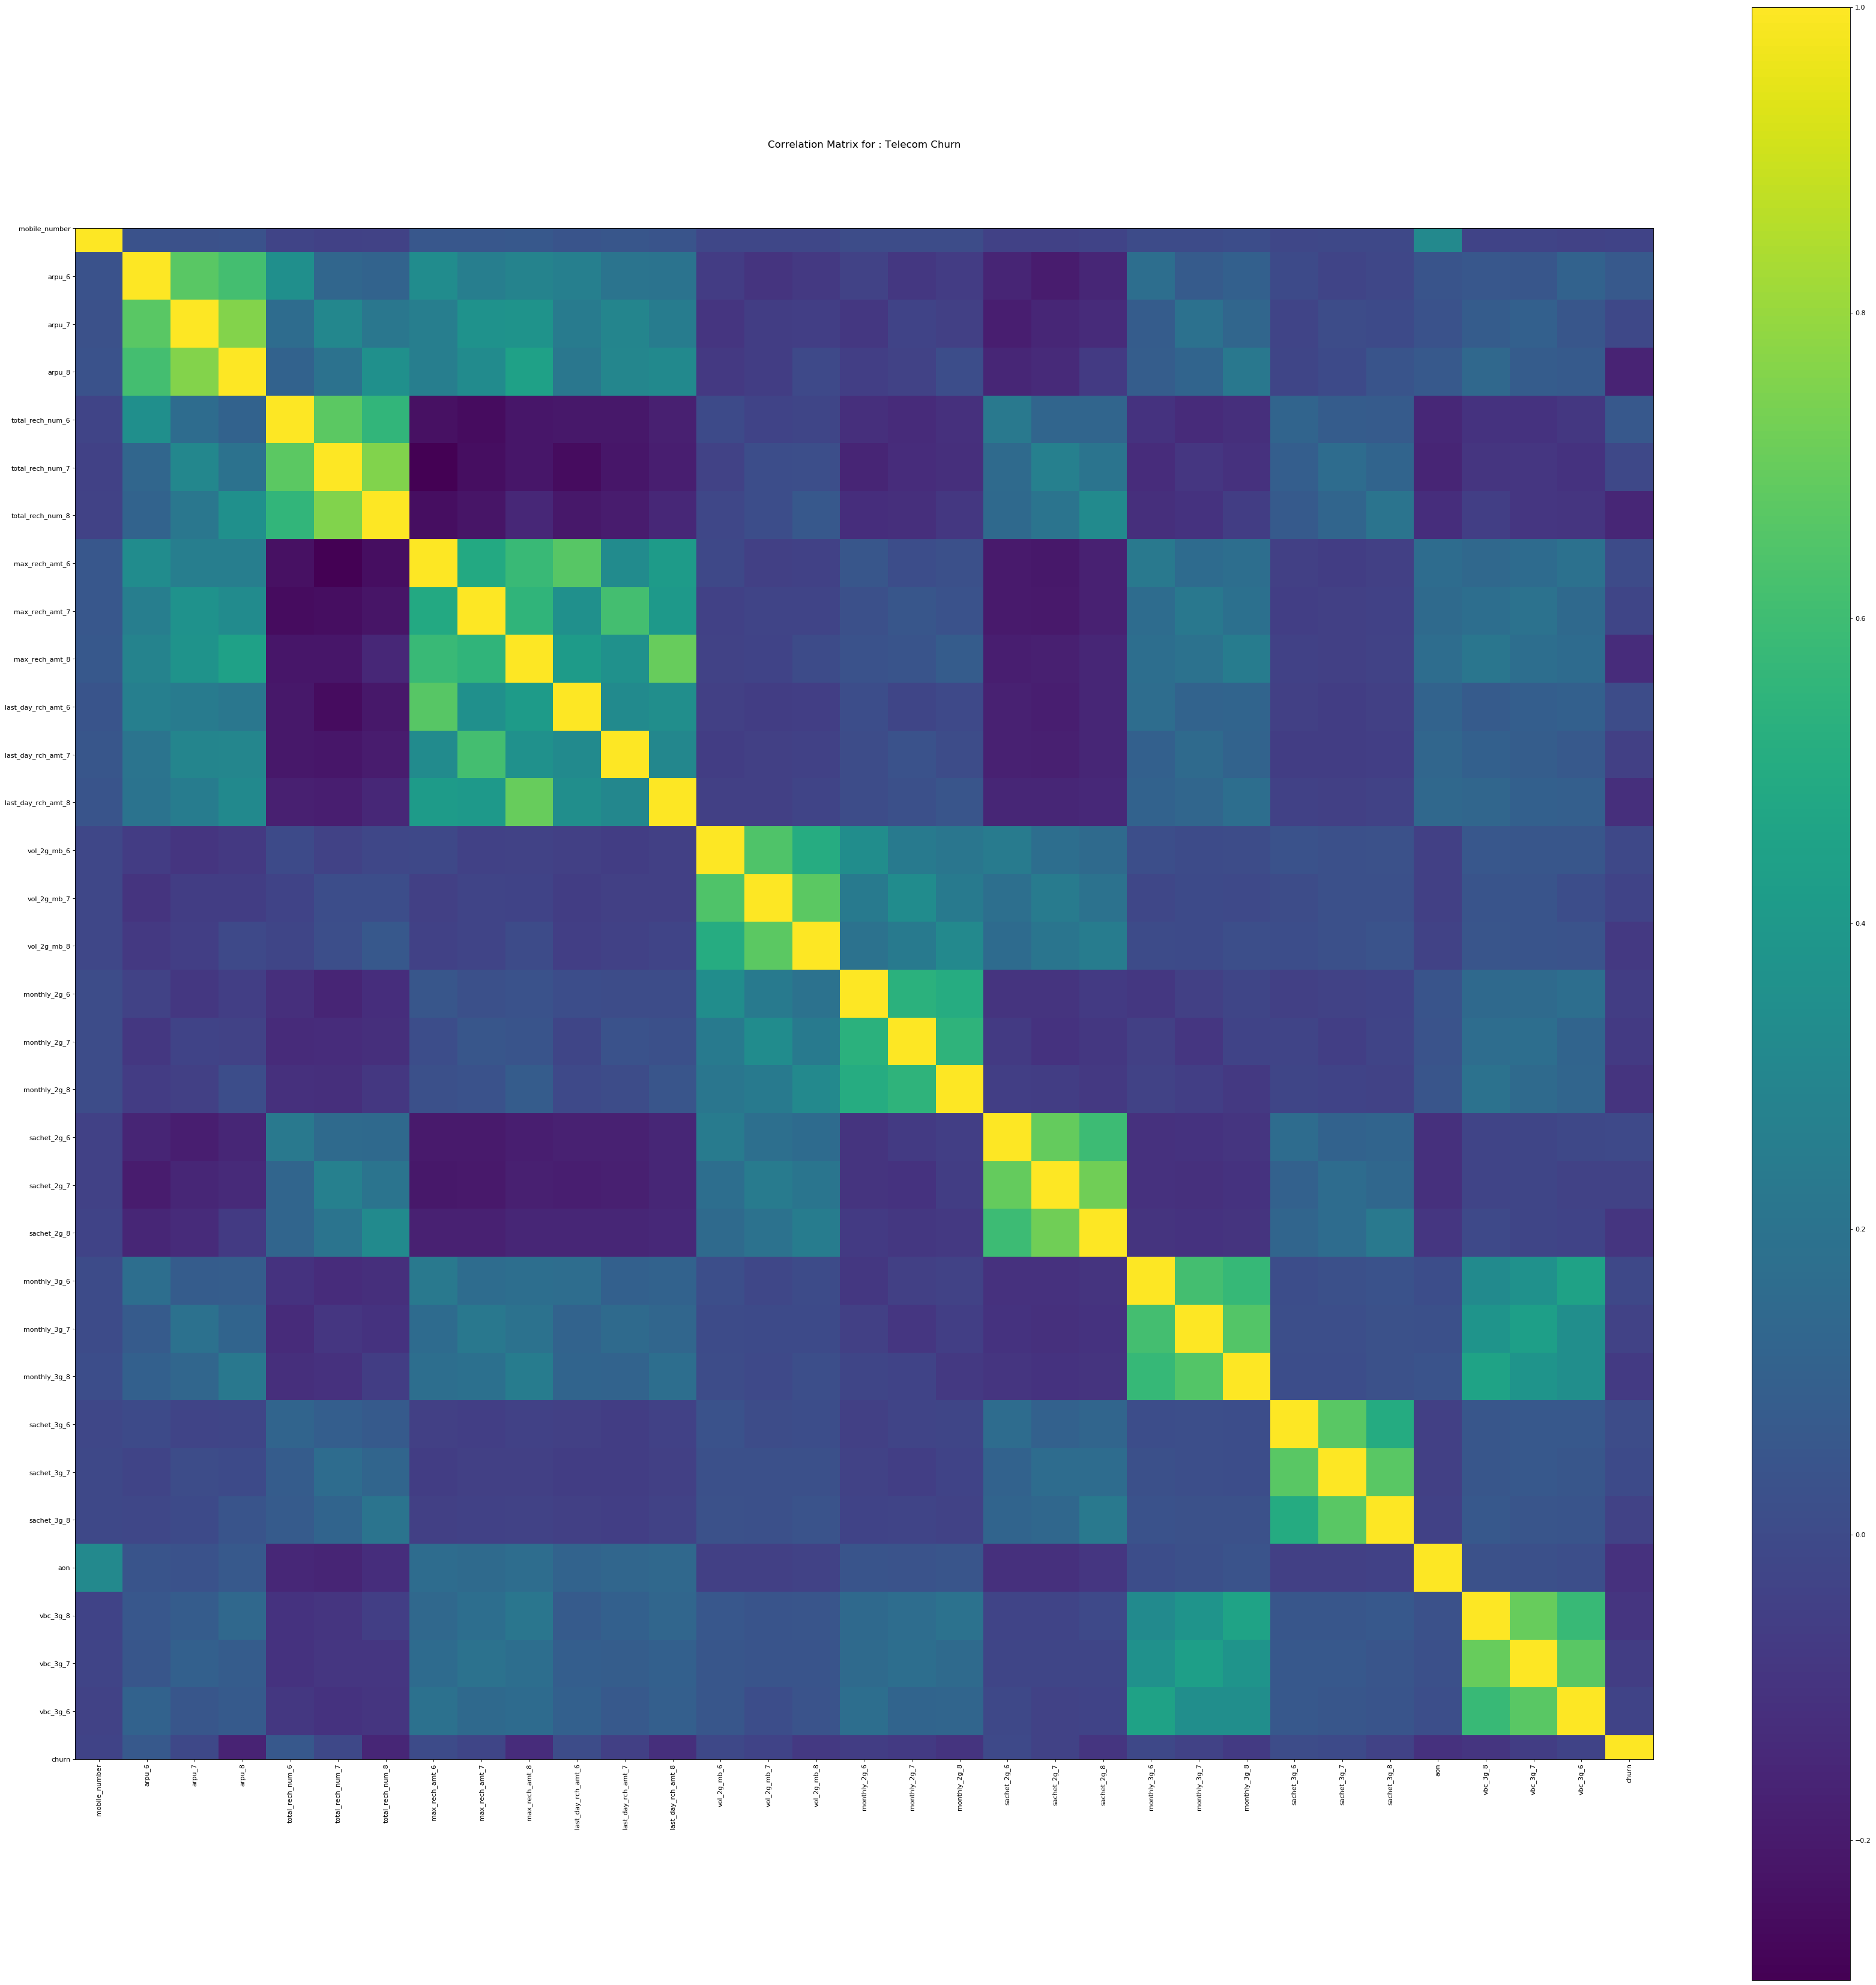

In [27]:
plotCorrMatrix(df_hvc, 53)

Plotting Scatter & density plots:

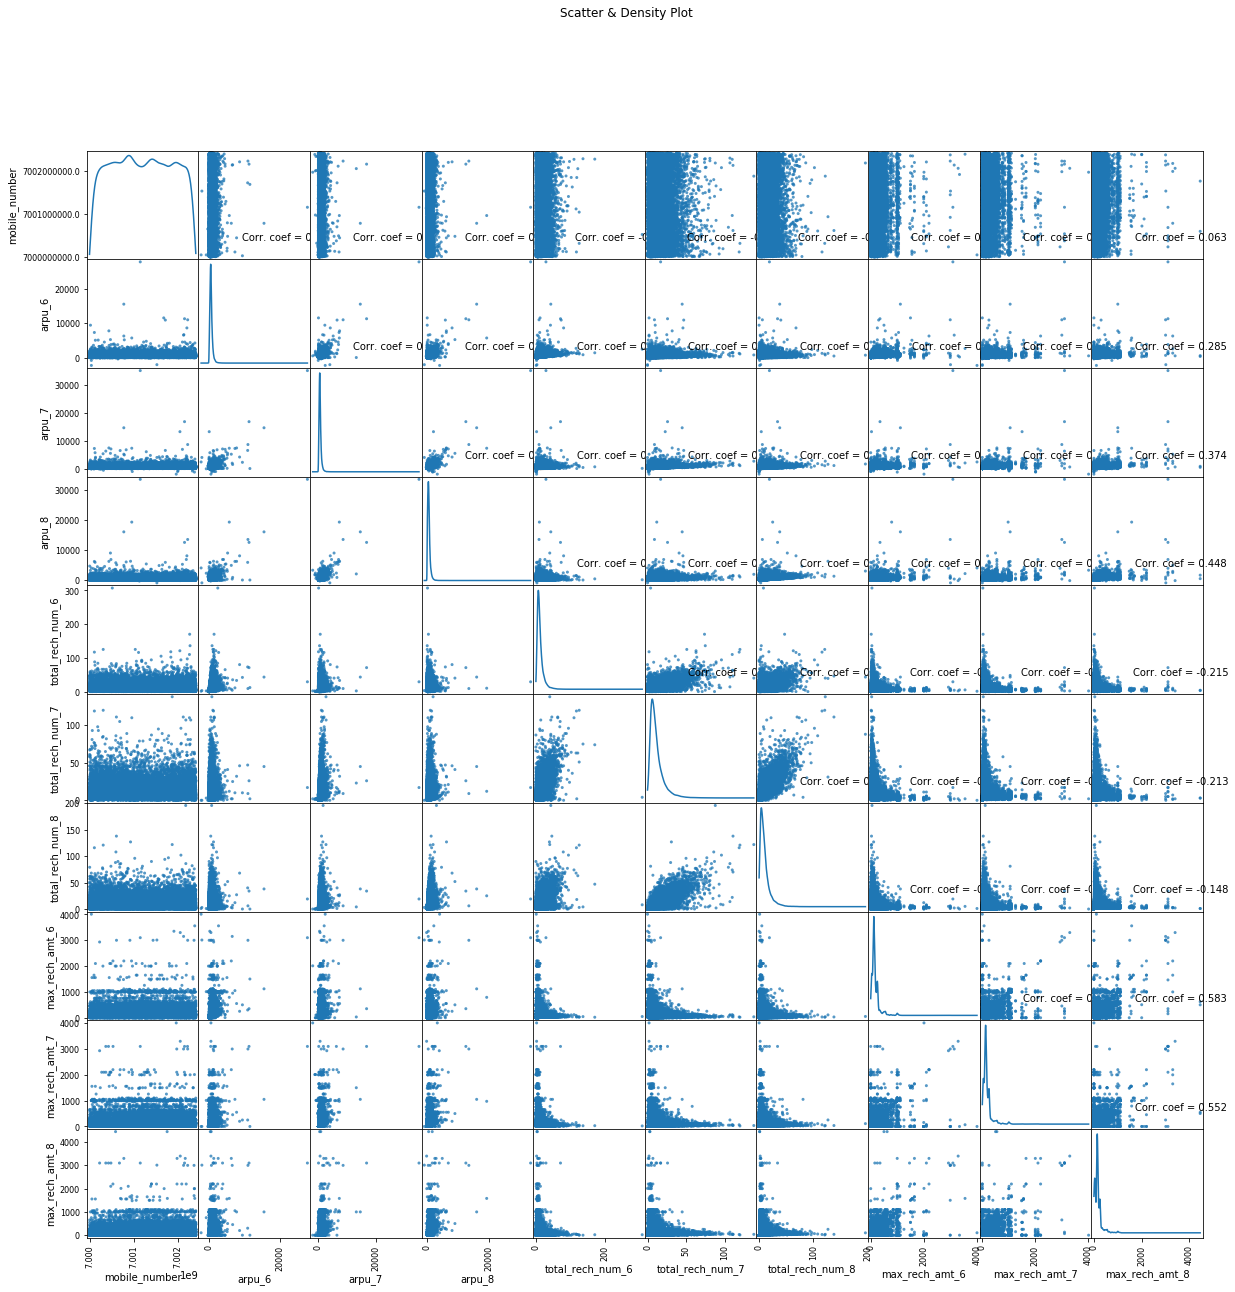

In [28]:
plotScatMatrix(df_hvc, 20, 10)

### Reduce the number of columns by creating New Features with 6th and 7th Month variables :

Create Columns with average of 6th & 7th Month : "Good" Phase & keep the 8th month intact as it's "Action" Phase, for now to see if it can give any additional insight.

In [29]:
column_list = df_hvc.filter(regex='_6|_7').columns.str[:-2]
column_list.unique()

print (df_hvc.shape)

for idx, col in enumerate(column_list.unique()):
    print(col)
    avg_col_name = "avg_"+col+"_av67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    df_hvc[avg_col_name] = (df_hvc[col_6]  + df_hvc[col_7])/ 2

(30001, 87)
arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_t2c_mou
loc_og_mou
std_og_t2f_mou
std_og_mou
isd_og_mou
spl_og_mou
og_others
loc_ic_mou
std_ic_t2t_mou
std_ic_t2f_mou
std_ic_mou
spl_ic_mou
isd_ic_mou
ic_others
total_rech_num
max_rech_amt
last_day_rch_amt
vol_2g_mb
monthly_2g
sachet_2g
monthly_3g
sachet_3g
vbc_3g


In [30]:
print (df_hvc.shape)

col_list = df_hvc.filter(regex='_6|_7').columns

df_hvc.drop(col_list, axis=1, inplace=True)
df_hvc.shape

(30001, 115)


(30001, 59)

In [31]:
df_hvc.head()

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,churn,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2c_mou_av67,avg_loc_og_mou_av67,avg_std_og_t2f_mou_av67,avg_std_og_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_loc_ic_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2f_mou_av67,avg_std_ic_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_vol_2g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67
0,7000842753,213.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,2,252,252,5.75,0,0,1,0,968,30.40,1,206.10,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,3.50,252.00,252.00,15.72,0.00,0.00,1.00,0.00,50.60
7,7000701601,"3,171.48",52.29,325.91,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.00,188.04,30.39,22.21,193.94,0.00,31.59,15.14,7,1580,779,0.00,0,0,0,0,802,57.74,1,"1,209.51",56.26,510.29,24.86,18.16,0.00,478.03,13.37,68.00,0.09,2.25,0.00,391.56,24.36,43.22,176.81,0.10,8.29,15.46,5.00,"1,185.00",0.00,0.00,0.00,0.00,0.00,0.00,19.06
8,7001524846,137.36,35.08,136.48,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.00,15.79,0.10,0.00,0.75,0.00,0.00,0.00,14,30,10,0.03,0,3,0,0,315,21.03,0,435.47,382.36,87.64,0.00,0.00,0.00,333.13,0.00,136.87,0.00,0.00,0.00,52.63,0.29,0.00,13.54,0.00,0.00,0.00,20.00,122.00,25.00,178.00,0.50,0.50,0.00,0.00,516.40
21,7002124215,637.76,85.14,983.39,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.00,159.11,0.18,0.00,101.93,0.00,0.00,0.00,27,50,50,0.00,0,0,0,0,720,0.00,0,556.10,117.26,827.30,0.00,0.00,0.00,95.56,0.00,848.99,0.00,0.00,0.00,106.50,10.02,0.00,62.98,0.00,0.00,0.00,24.00,50.00,25.00,0.00,0.00,0.00,0.00,0.00,0.00
23,7000887461,366.97,33.58,205.89,0.00,0.00,17.71,182.14,0.00,39.61,0.00,17.71,0.00,224.21,13.38,0.00,57.29,0.00,3.74,13.06,4,179,0,0.01,0,0,1,1,604,40.45,0,134.12,49.81,87.38,0.00,0.00,0.00,132.80,0.00,4.35,0.01,0.05,0.00,145.52,0.26,0.00,8.92,0.00,14.12,2.67,4.00,89.50,89.50,0.24,0.00,0.00,1.00,0.00,25.93


In [32]:
# To analyse the relationship of the varaibles with AON , lets convert the same into months: 
df_hvc['age_mon'] = df_hvc['aon']/30
df_hvc.drop('aon', axis=1, inplace=True)
df_hvc['age_mon'].head()

0    32.27
7    26.73
8    10.50
21   24.00
23   20.13
Name: age_mon, dtype: float64

Text(0.5, 1.0, 'Churn- Pie Distribution')

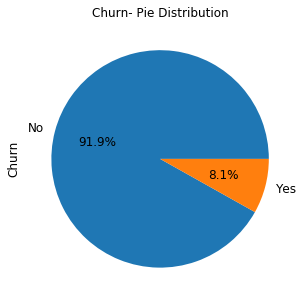

In [33]:
# Finding the distribution of Churn in the dataset: 
pie = (df_hvc['churn'].value_counts()*100.0 /len(df_hvc)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           

pie.set_ylabel('Churn',fontsize = 12)
pie.set_title('Churn- Pie Distribution', fontsize = 12)

It can be observed from the pie distribution that approx. 92 % of the clients do not churn. This is an example of class imbalance and we may end up getting False Negatives. This is undesirable for the case study as we may classify important churn clients as non-churn. Hence we need to work on getting high Recall rate.

#### Distribution graphs (histogram/bar graph) of sampled columns:

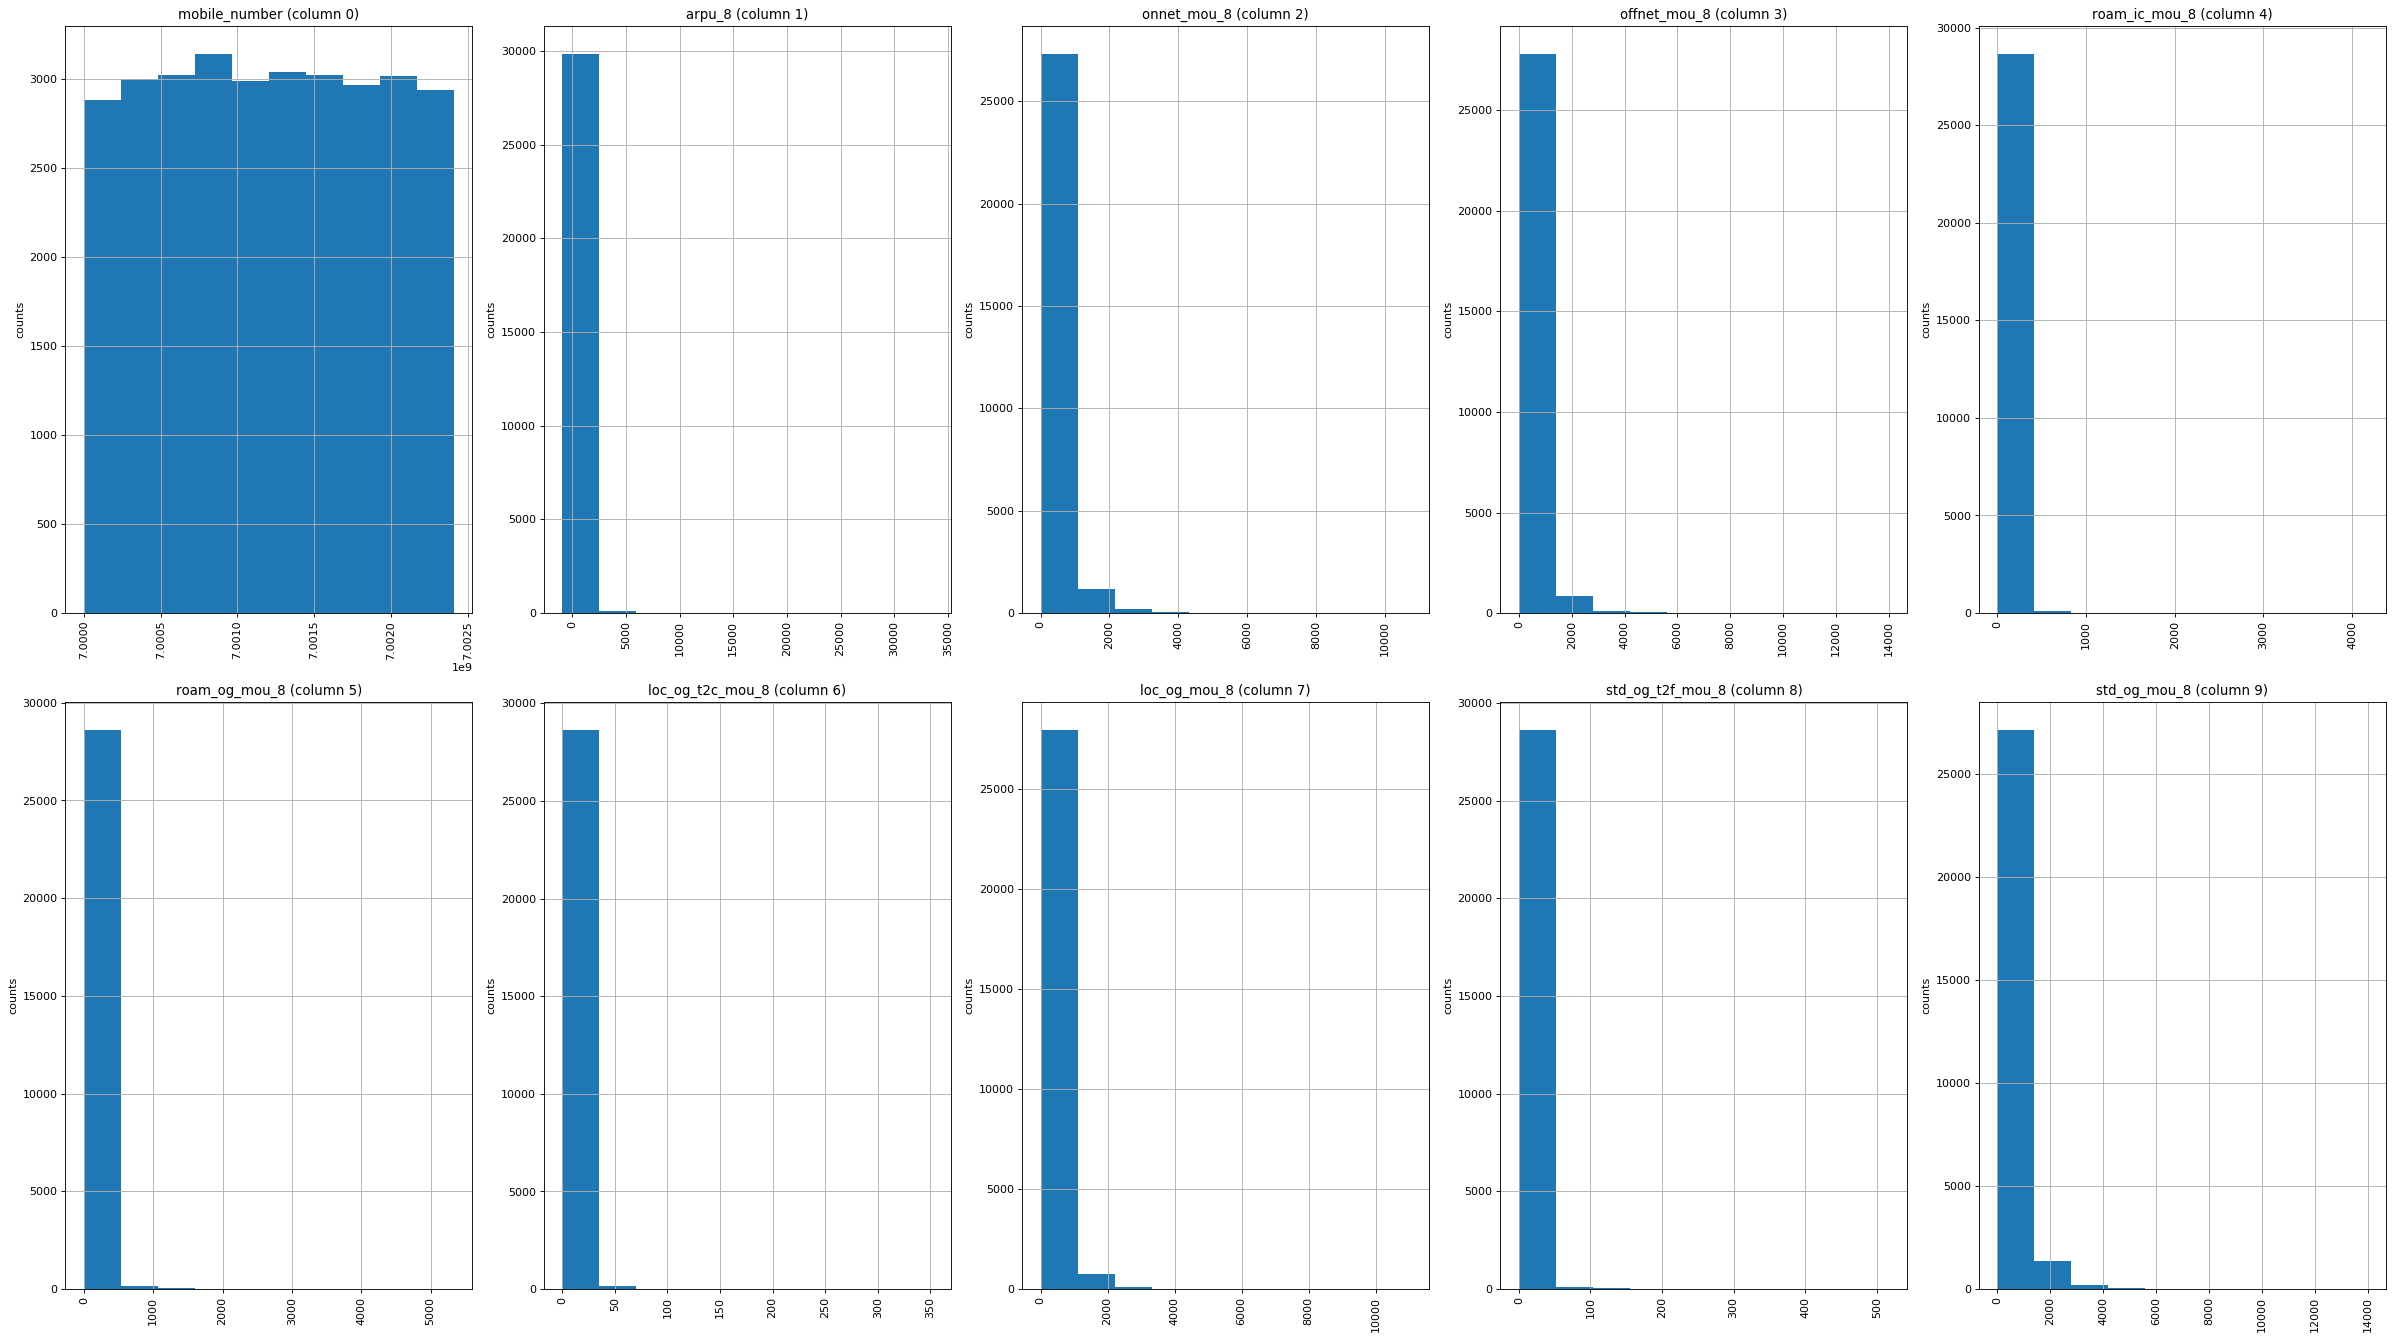

In [34]:
plotPerColumnDist(df_hvc, 10, 5)

#### Plotting Correlation matrix:

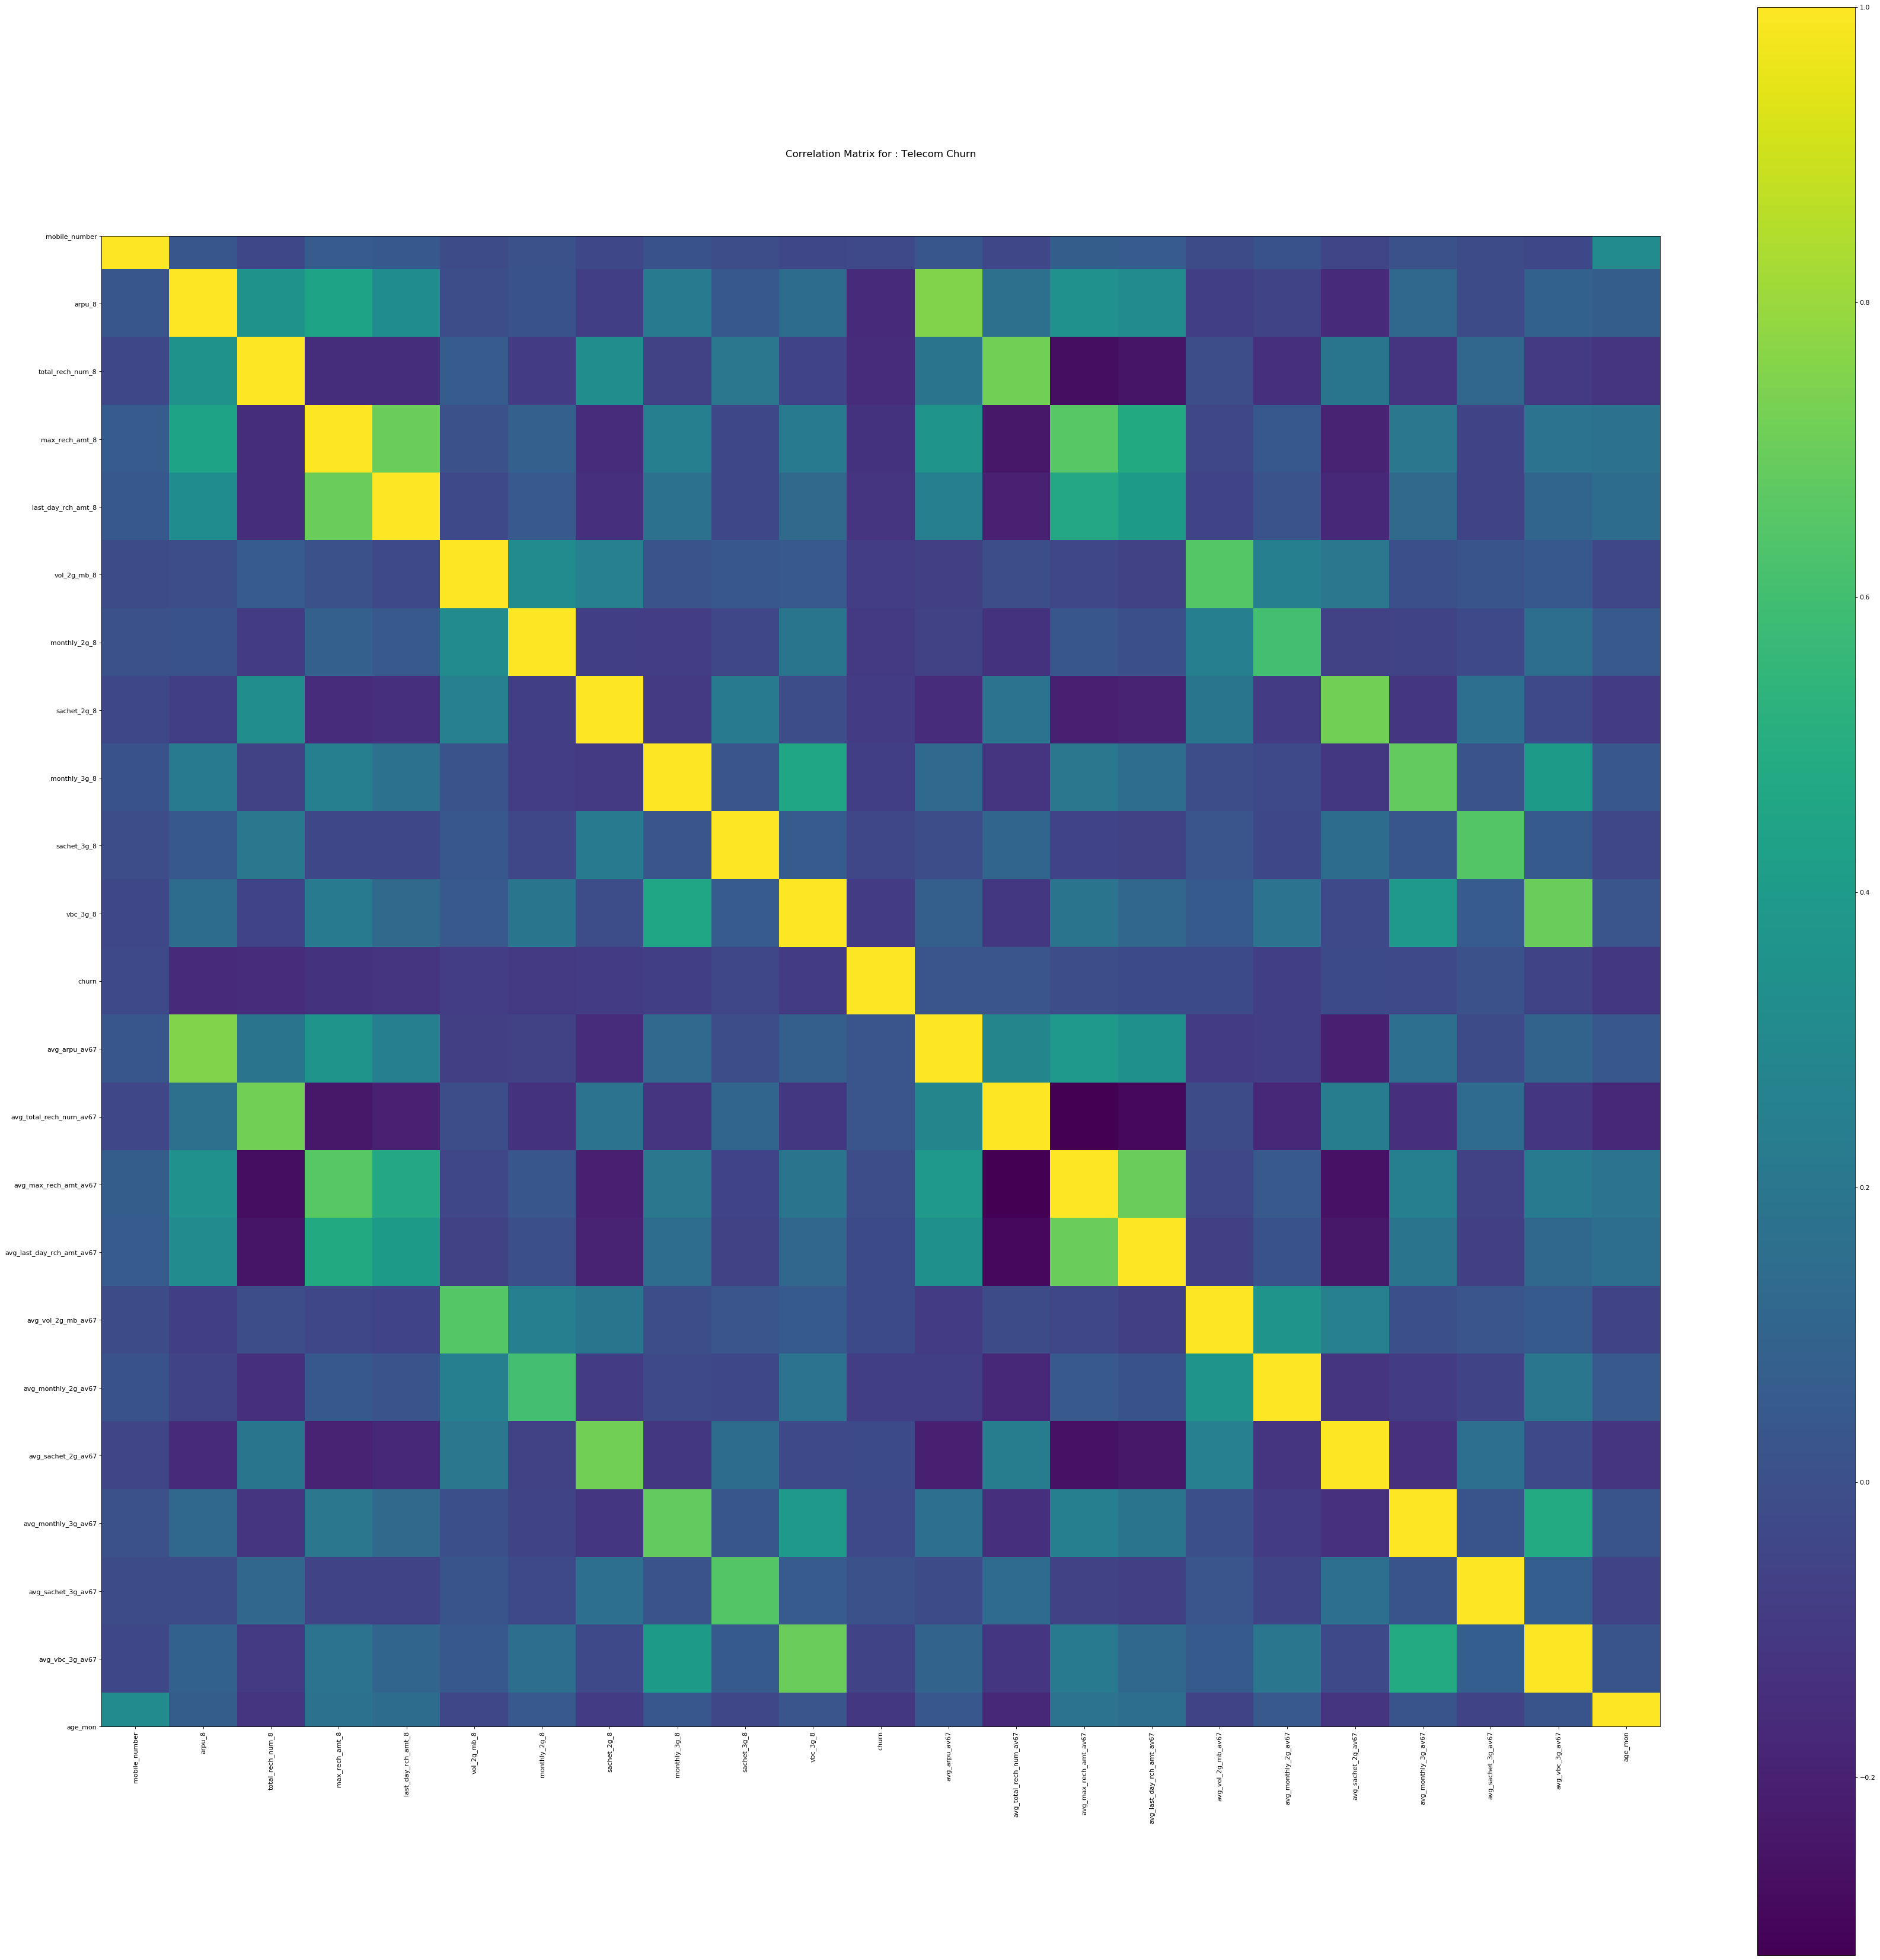

In [35]:
plotCorrMatrix(df_hvc, 53)

#### Plotting Scatter & density plots:

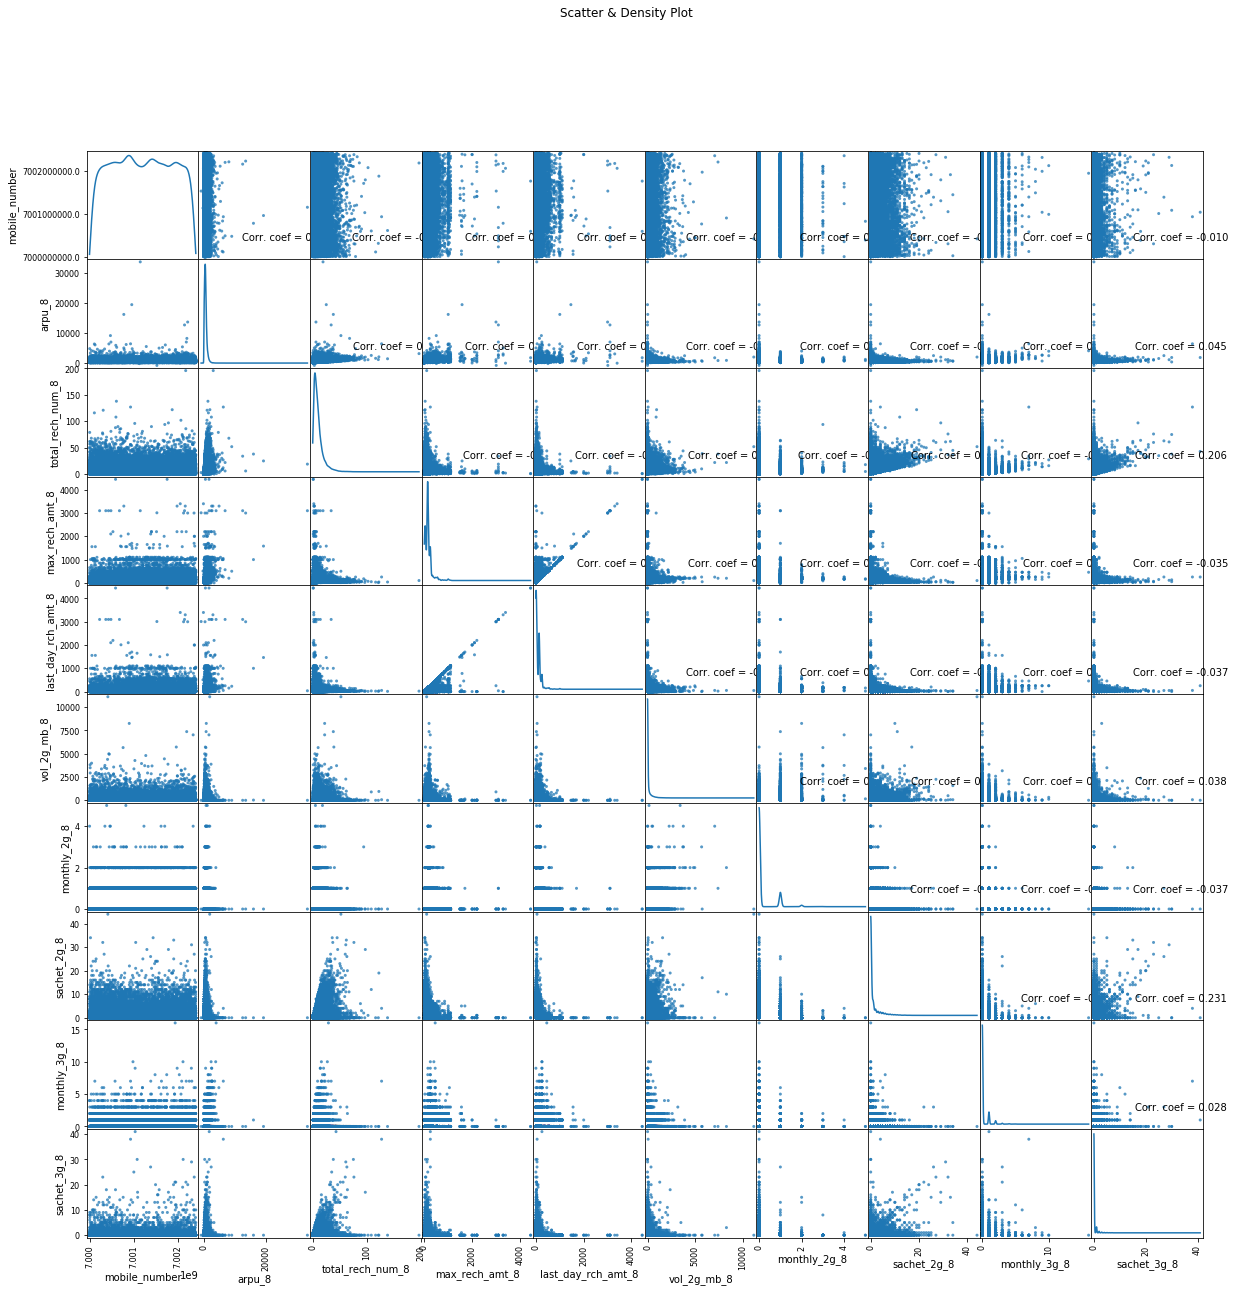

In [36]:
plotScatMatrix(df_hvc, 20, 10)

#### A. Plotting the distribution of Customers based on the Age on Network: 

Text(0.5, 1.0, 'Distribution of Customers by their tenure')

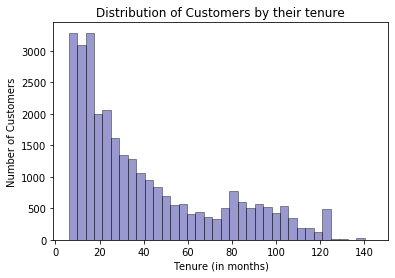

In [37]:

dis = sns.distplot(df_hvc['age_mon'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
dis.set_ylabel('Number of Customers')
dis.set_xlabel('Tenure (in months)')
dis.set_title('Distribution of Customers by their tenure')

In [38]:
plt_range = [0, 6, 12, 24, 60, 61]
plt_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs & above']
df_hvc['tenure_range'] = pd.cut(df_hvc['age_mon'], plt_range, labels=plt_label)
df_hvc['tenure_range'].head()

0     2-5 Yrs    
7     2-5 Yrs    
8     6-12 Months
21    1-2 Yrs    
23    1-2 Yrs    
Name: tenure_range, dtype: category
Categories (5, object): [0-6 Months < 6-12 Months < 1-2 Yrs < 2-5 Yrs < 5 Yrs & above]

#### B. Plotting the Churn cases based on the Age on Network
It very essential to understand if the Age on Network plays a vital role in retaininig the customer or defining Churn

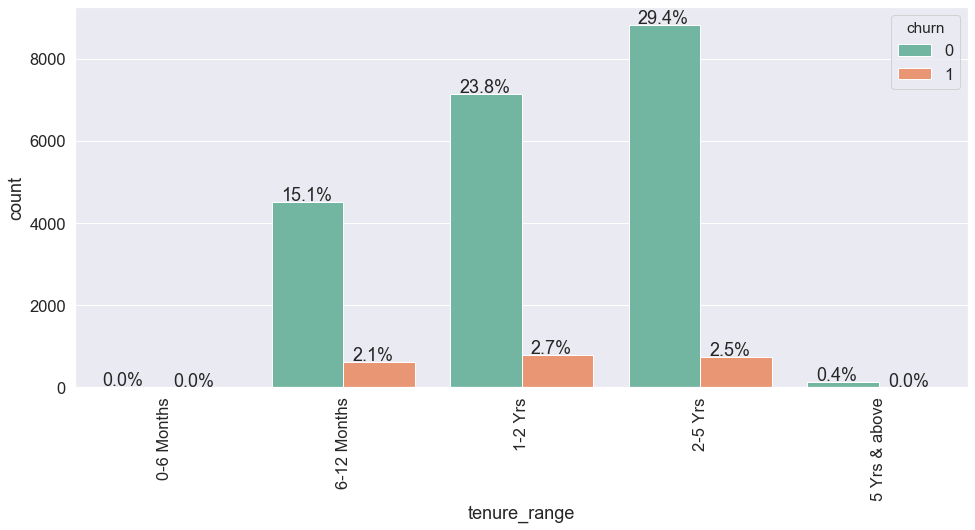

In [39]:
# Churn Age on Network-wise
sns.set()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

temp = pd.Series(data = 'tenure_range')
fig, ax = plt.subplots()
width = len(df_hvc['tenure_range'].unique()) + 6 + 4*len(temp.unique())
fig.set_size_inches(width , 7)

total = float(len(df_hvc.index))
ax = sns.countplot(x="tenure_range", data=df_hvc, palette="Set2", hue = "churn");
for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df_hvc))), (p.get_x()+0.05, p.get_height()+20))
plt.xticks(rotation=90)
plt.show()

Observation : It can be interpreted that the percentage of the clients who do not churn increase with the increase in the tenure on the network upto 5 years post which it drastically drops. Hence it can be recommended to the telecom companies to retain client for averagely 2 years to retain them. However, we can observe that the user in bin of 5 Years and more fall drastically , which indicates that some new plans are required to be released after 5th year to retain the customers and reduce the churn.

#### C. Plotting Correlation of "Churn" with other variables as well :

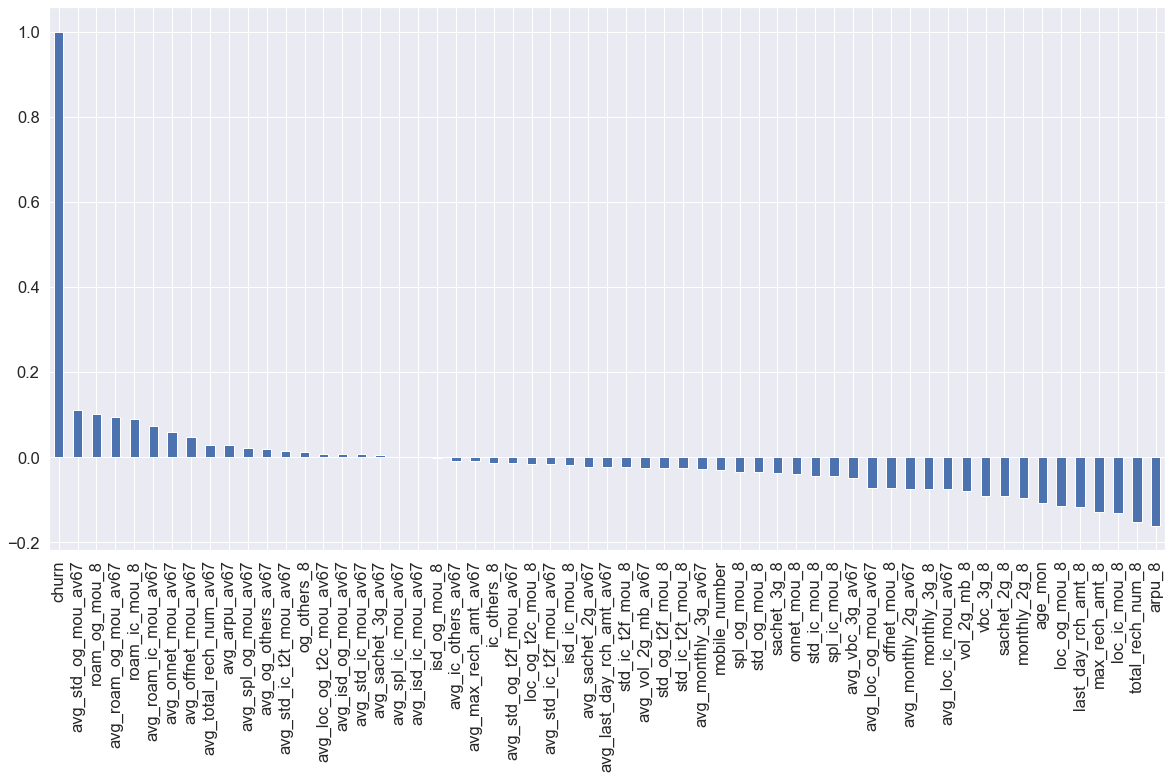

In [40]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(20,10))
df_hvc.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

Observation : Churn has a positive correlation with Avg STD Outgoing Calls for Month 6 & 7 and Outgoing calls in Roaming,  while Churn is negatively correlated with Avg Revenue, number  Of Recharge for 8th Month.

Based on the above correlation plot, let's understant the trend of Churn versus some important variables.

#### C.1  Churn vs Tenure (Age on Network)

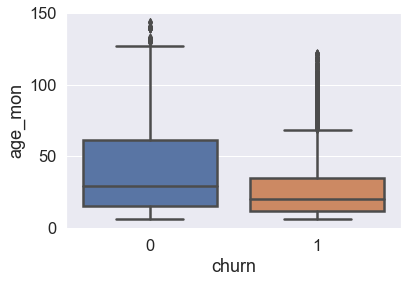

In [41]:
sns.boxplot(x = df_hvc.churn, y = df_hvc.age_mon)

Observation : The customers who spend more time(> 60 months) on the network churn less as compared to clients having less longevity on the network. 

#### C.2 Churn Vs Max Recharge Amount

Text(0.5, 1.0, 'Distribution of Max Recharge Amount by Churn')

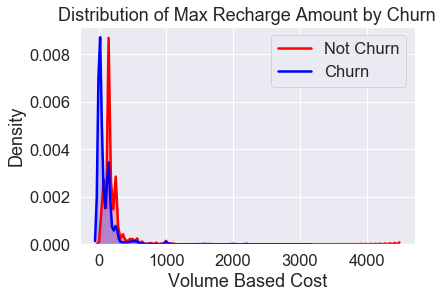

In [42]:
dis = sns.kdeplot(df_hvc.max_rech_amt_8[(df_hvc["churn"] == 0)],
                color="Red", shade = True)
dis = sns.kdeplot(df_hvc.max_rech_amt_8[(df_hvc["churn"] == 1)],
                ax =dis, color="Blue", shade= True)
dis.legend(["Not Churn","Churn"],loc='upper right')
dis.set_ylabel('Density')
dis.set_xlabel('Volume Based Cost')
dis.set_title('Distribution of Max Recharge Amount by Churn')

#### C.3 Churn Vs Volume based cost (VBC)

Text(0.5, 1.0, 'Distribution of Volume Based Cost by Churn')

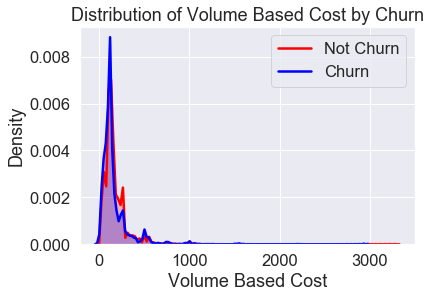

In [43]:
dis = sns.kdeplot(df_hvc.avg_max_rech_amt_av67[(df_hvc["churn"] == 0)],
                color="Red", shade = True)
dis = sns.kdeplot(df_hvc.avg_max_rech_amt_av67[(df_hvc["churn"] == 1)],
                ax =dis, color="Blue", shade= True)
dis.legend(["Not Churn","Churn"],loc='upper right')
dis.set_ylabel('Density')
dis.set_xlabel('Volume Based Cost')
dis.set_title('Distribution of Volume Based Cost by Churn')

Observation: 
- C.2: People Who Recharge with less amount are more likely to Churn
- C.3: There is no visible difference between distribution of  VBC and Churn

## 5. Model Building and Model Evaluation
    1. Model 1 for Interpretation ( Non PCA Model) - This will be used to find the features for decision making.
    2. Model 2,3,4 for Prediction ( PCA based models)- These will be used for prediction of the churn.
Let's start by splitting our data into a training set and a test set. Also doing some prework before we build the model.

In [45]:
#Let us create a dataframe with short form to easily use the name for Model Building: 

df = df_hvc[:].copy()

#Dropping tenure_range since we have AON MONTH already & columns are highly coorelated
df.drop('tenure_range', axis=1, inplace=True)
df.drop('mobile_number', axis=1, inplace=True)

#Since All The Values are realted to Price/ Cost/ Amount, Filling NaN with 0

df.fillna(0, inplace=True)

df.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,vbc_3g_8,churn,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2c_mou_av67,avg_loc_og_mou_av67,avg_std_og_t2f_mou_av67,avg_std_og_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_loc_ic_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2f_mou_av67,avg_std_ic_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_vol_2g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,age_mon
0,213.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,2,252,252,5.75,0,0,1,0,30.40,1,206.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.50,252.00,252.00,15.72,0.00,0.00,1.00,0.00,50.60,32.27
7,"3,171.48",52.29,325.91,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.00,188.04,30.39,22.21,193.94,0.00,31.59,15.14,7,1580,779,0.00,0,0,0,0,57.74,1,"1,209.51",56.26,510.29,24.86,18.16,0.00,478.03,13.37,68.00,0.09,2.25,0.00,391.56,24.36,43.22,176.81,0.10,8.29,15.46,5.00,"1,185.00",0.00,0.00,0.00,0.00,0.00,0.00,19.06,26.73
8,137.36,35.08,136.48,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.00,15.79,0.10,0.00,0.75,0.00,0.00,0.00,14,30,10,0.03,0,3,0,0,21.03,0,435.47,382.36,87.64,0.00,0.00,0.00,333.13,0.00,136.87,0.00,0.00,0.00,52.63,0.29,0.00,13.54,0.00,0.00,0.00,20.00,122.00,25.00,178.00,0.50,0.50,0.00,0.00,516.40,10.50
21,637.76,85.14,983.39,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.00,159.11,0.18,0.00,101.93,0.00,0.00,0.00,27,50,50,0.00,0,0,0,0,0.00,0,556.10,117.26,827.30,0.00,0.00,0.00,95.56,0.00,848.99,0.00,0.00,0.00,106.50,10.02,0.00,62.98,0.00,0.00,0.00,24.00,50.00,25.00,0.00,0.00,0.00,0.00,0.00,0.00,24.00
23,366.97,33.58,205.89,0.00,0.00,17.71,182.14,0.00,39.61,0.00,17.71,0.00,224.21,13.38,0.00,57.29,0.00,3.74,13.06,4,179,0,0.01,0,0,1,1,40.45,0,134.12,49.81,87.38,0.00,0.00,0.00,132.80,0.00,4.35,0.01,0.05,0.00,145.52,0.26,0.00,8.92,0.00,14.12,2.67,4.00,89.50,89.50,0.24,0.00,0.00,1.00,0.00,25.93,20.13


In [46]:
# Creating the dependent (y) and independent variables (x). Also dropping the Churn column from the final dataframe df.
X = df.drop(['churn'], axis=1)
y = df['churn']

df.drop('churn', axis=1, inplace=True)

In [47]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [48]:
# Splitting the data into train and test sets.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

In [49]:
# Priting the shape of Train and Test datasets
print("X_train Shape : ", X_train.shape)
print("X_test Shape : ", X_test.shape)

# Finding the imbalance in the datasets: 
y_train_imbal = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imbal = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train Data : ", y_train_imbal)
print("Imbalance in Test Data : ", y_test_imbal)

X_train Shape :  (21000, 57)
X_test Shape :  (9001, 57)
Imbalance in Train Data :  0.08875985068436333
Imbalance in Test Data :  0.08812862669245648


In [50]:
# conda install -c conda-forge imbalanced-learn 
'''Run this command to install the libraries required for treating class imbalance. Commenting it as we would not need this agian and again once the installation is done'''

'Run this command to install the libraries required for treating class imbalance. Commenting it as we would not need this agian and again once the installation is done'

##### Applying SMOTE to remove class imbalance in Train Set

In [51]:
# Balancing DataSet using SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(kind = "regular")
X_tr_smt, y_tr_smt = smt.fit_sample(X_train,y_train)

In [52]:
print("X_tr_bal Shape", X_tr_smt.shape)
print("y_tr_bal Shape", y_tr_smt.shape)

imb = (y_tr_smt != 0).sum()/(y_tr_smt == 0).sum()
print("Imbalance in Train Data : ",imb)

X_tr_bal Shape (38576, 57)
y_tr_bal Shape (38576,)
Imbalance in Train Data :  1.0


### Model 1: Support Vecor Machine (SVM)

In [53]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

lr = LogisticRegression()

lr.svm = SVC(kernel='linear') 
lr.svm.fit(X_train,y_train)
preds = lr.svm.predict(X_test)
print (metrics.accuracy_score(y_test, preds))

0.9170138310281619


#### RFE

In [54]:
# Feature reduction using RFE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.feature_selection import RFE

# running RFE with 15 variables as output
rfe = RFE(lr, 15)   
rfe = rfe.fit(X_tr_smt, y_tr_smt)

In [55]:
rfe_features = list(df.columns[rfe.support_])
print("Significant features identified by RFE ", rfe_features)

Significant features identified by RFE  ['loc_og_mou_8', 'og_others_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'avg_arpu_av67', 'avg_loc_ic_mou_av67', 'avg_std_ic_mou_av67', 'avg_total_rech_num_av67']


In [56]:
# Taking the rfe dependent (significant varaibles found in the above step) and independent variable (it remains the same throughout)
X_rfe = pd.DataFrame(data=X_tr_smt).iloc[:, rfe.support_]
y_rfe = y_tr_smt

### Model 2 : Logistic Regression (without PCA)

In [57]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=1)
lr.fit(X_rfe, y_rfe)

LogisticRegression(random_state=1)

In [58]:
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]

y_pred = lr.predict(X_test_rfe)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[4457 1046]
 [  88  410]]


In [59]:
print('Accuracy of Logistic Regression Model on test set is ',lr.score(X_test_rfe, y_test))

Accuracy of Logistic Regression Model on test set is  0.8110314947508749


In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      5503
           1       0.28      0.82      0.42       498

    accuracy                           0.81      6001
   macro avg       0.63      0.82      0.65      6001
weighted avg       0.92      0.81      0.85      6001



In [61]:
# To get the weights of all the variables
wts = pd.Series(lr.coef_[0],
                 index=rfe_features)
wts.sort_values(ascending = False)

avg_loc_ic_mou_av67       0.54 
avg_arpu_av67             0.48 
avg_std_ic_mou_av67       0.31 
avg_total_rech_num_av67   0.30 
spl_ic_mou_8              -0.28
vol_2g_mb_8               -0.29
last_day_rch_amt_8        -0.45
monthly_3g_8              -0.49
sachet_2g_8               -0.59
monthly_2g_8              -0.70
loc_og_mou_8              -0.88
total_rech_num_8          -0.88
std_ic_mou_8              -0.95
loc_ic_mou_8              -2.49
og_others_8               -2.60
dtype: float64

#### Model summary of Logistic Regression without PCA

- Model Accuracy is 81%
- Confusion matix  shows that the model has drawback in predicting churn as high false positives.
- The recall score is 85% which seems to be decent.

### Using PCA on the data

### Model 3 : Logistic Regression ( with PCA)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

#Applying Smote
from imblearn.over_sampling import SMOTE
sm = SMOTE(kind = "regular")
X_tr_smt,y_tr_smt = sm.fit_sample(X_train,y_train)
print(X_tr_smt.shape)
print(y_tr_smt.shape)

(38576, 57)
(38576,)


Applying PCA

In [63]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

#Doing the PCA on the train data
pca.fit(X_tr_smt)

PCA(random_state=100)

In [64]:
X_tr_smt_pca = pca.fit_transform(X_tr_smt)
print(X_tr_smt_pca.shape)

X_test_smt_pca = pca.transform(X_test)
print(X_test_smt_pca.shape)

(38576, 57)
(9001, 57)


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_pca = LogisticRegression(C=1e9)
lr_pca.fit(X_tr_smt_pca, y_tr_smt)

# Predicted probabilities
y_pred = lr_pca.predict(X_test_smt_pca)

# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [66]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[6757 1515]
 [ 130  599]]


In [67]:
print("Logistic Regression accuracy with PCA: ",accuracy_score(y_test,y_pred))

Logistic Regression accuracy with PCA:  0.8172425286079325


In [68]:
columns = list(df.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})
df_pca.head(10)

,PC1,PC2,PC3,Feature
0,0.25,-0.13,0.17,vbc_3g
1,0.14,-0.20,-0.02,vbc_3g
2,0.20,-0.20,0.06,vbc_3g
3,0.36,0.30,-0.18,vbc_3g
4,0.28,0.17,-0.16,vbc_3g
5,0.03,-0.06,-0.00,vbc_3g
6,0.11,-0.12,0.19,vbc_3g
7,0.04,-0.00,0.08,vbc_3g
8,0.15,-0.26,-0.06,vbc_3g
9,0.02,-0.01,0.04,vbc_3g


Using the scree plot to find the optimum number of components to be used to explain maximum varaince

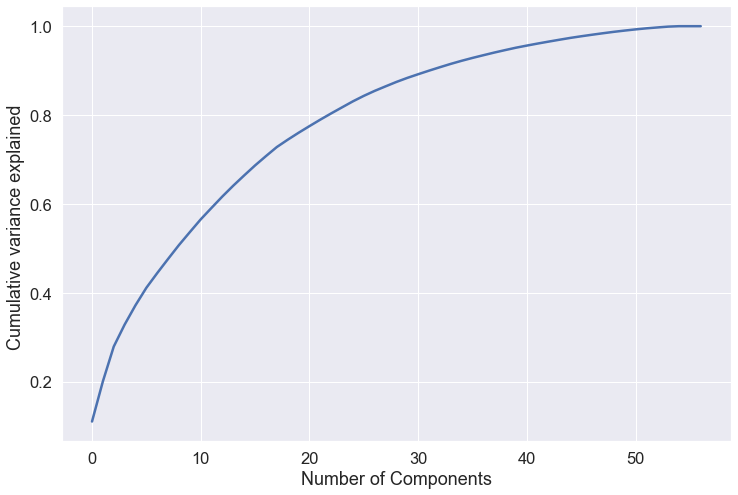

In [69]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative variance explained ')
plt.show()

In [70]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 11.04,  20.08,  27.91,  32.85,  37.21,  41.14,  44.45,  47.64,
        50.76,  53.67,  56.53,  59.13,  61.7 ,  64.13,  66.43,  68.67,
        70.77,  72.81,  74.46,  76.02,  77.51,  78.97,  80.38,  81.74,
        83.09,  84.32,  85.44,  86.45,  87.45,  88.36,  89.19,  89.99,
        90.76,  91.51,  92.21,  92.86,  93.47,  94.07,  94.63,  95.17,
        95.65,  96.11,  96.55,  96.97,  97.38,  97.75,  98.1 ,  98.43,
        98.75,  99.04,  99.31,  99.55,  99.74,  99.93, 100.03, 100.03,
       100.03])

Using Logistic Regression with 40 Columns which explain 90% of the variance

In [71]:
df_pca_40 = PCA(n_components=40)

df_tr_smt_pca_40 = df_pca_40.fit_transform(X_tr_smt)
print(df_tr_smt_pca_40.shape)

df_test_pca_40 = df_pca_40.transform(X_test)
print(df_test_pca_40.shape)

(38576, 40)
(9001, 40)


In [72]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_pca1 = LogisticRegression(C=1e9)
lr_pca1.fit(df_tr_smt_pca_40, y_tr_smt)

# Predicted probabilities
y_pred40 = lr_pca1.predict(df_test_pca_40)

# Converting y_pred to a dataframe which is an array
df_y_pred = pd.DataFrame(y_pred40)

In [73]:
print(confusion_matrix(y_test,y_pred40))

[[6740 1532]
 [ 134  595]]


In [74]:
print("Accuracy of Logistic Regression with PCA: ",accuracy_score(y_test,y_pred40))

Accuracy of Logistic Regression with PCA:  0.814909454505055


#### Model Summary of Logistic Regression with PCA
 - Model with PCA has 81% Accuracy and 81% Recall.
 - 90 % of the variance is explained by 50 variables with optimum accuracy and recall.
 - Main Features are arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8.

### Model 4.  Decision Tress

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

#Applying Smote
from imblearn.over_sampling import SMOTE
smt = SMOTE(kind = "regular")
X_tr_smt,y_tr_smt = smt.fit_sample(X_train,y_train)
print(X_tr_smt.shape)
print(y_tr_smt.shape)

(38576, 57)
(38576,)


Reducing feature using LASSO

In [76]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_tr_smt, y_tr_smt)
model = SelectFromModel(lsvc, prefit=True)
X_lasso = model.transform(X_tr_smt)
pos = model.get_support(indices=True)
 ### Feature reduction using RFE
print(X_lasso.shape)
print(pos)

(38576, 30)
[ 0  2  3  4  6  7  8 10 12 15 16 19 21 22 23 24 25 26 27 28 31 33 36 40
 43 47 48 50 51 56]


In [77]:
#feature vector for decision tree
lasso_features = list(df.columns[pos])
print("Features used for LASSO model buidling: ", lasso_features)

Features used for LASSO model buidling:  ['arpu_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'spl_og_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'vbc_3g_8', 'avg_arpu_av67', 'avg_roam_ic_mou_av67', 'avg_loc_og_t2c_mou_av67', 'avg_std_og_mou_av67', 'avg_loc_ic_mou_av67', 'avg_std_ic_mou_av67', 'avg_total_rech_num_av67', 'avg_max_rech_amt_av67', 'avg_vol_2g_mb_av67', 'avg_monthly_2g_av67', 'age_mon']


Using default hyperparameters for Decision Tree construction

In [78]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Fitting the decision tree with default hyperparameters, keeping max_depth = 5. It would be easy to plot and read.
dt1 = DecisionTreeClassifier(max_depth=5)
dt1.fit(X_lasso, y_tr_smt)

DecisionTreeClassifier(max_depth=5)

In [79]:
# Importing metrics for evaluating the decision tree outcomes. Recall is important for us. 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score

# Making predictions 
X_test = pd.DataFrame(data=X_test).iloc[:, pos]
y_pred1 = dt1.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      8272
           1       0.36      0.78      0.49       729

    accuracy                           0.87      9001
   macro avg       0.67      0.83      0.71      9001
weighted avg       0.93      0.87      0.89      9001



In [80]:
# Printing confusion matrix & accuracy
print(confusion_matrix(y_test,y_pred1))
print('Accuracy of Decision Tree :',accuracy_score(y_test,y_pred1))
print('Recall of Decision Tree :',recall_score(y_test,y_pred1))

[[7275  997]
 [ 164  565]]
Accuracy of Decision Tree : 0.8710143317409177
Recall of Decision Tree : 0.7750342935528121


#### Hyperparameter Tuning :  
Lets try to increase the accuracy and recall by hyperparameter tuning

#### 4.1 Tuning max_depth

In [81]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# using the following parameters to build  the model
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dt = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dt, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(X_lasso, y_tr_smt)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy')

In [82]:
# scores of GridSearch CV
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.10,0.00,0.00,0.00,1,{'max_depth': 1},0.79,0.78,0.79,0.78,0.78,0.78,0.01,39,0.78,0.78,0.78,0.79,0.79,0.78,0.00
1,0.18,0.00,0.00,0.00,2,{'max_depth': 2},0.81,0.81,0.81,0.81,0.82,0.81,0.00,38,0.81,0.81,0.81,0.81,0.81,0.81,0.00
2,0.25,0.00,0.00,0.00,3,{'max_depth': 3},0.84,0.86,0.86,0.85,0.86,0.86,0.01,37,0.86,0.86,0.86,0.86,0.86,0.86,0.00
3,0.36,0.02,0.00,0.00,4,{'max_depth': 4},0.85,0.87,0.87,0.86,0.87,0.86,0.01,36,0.87,0.87,0.87,0.87,0.87,0.87,0.00
4,0.41,0.00,0.00,0.00,5,{'max_depth': 5},0.86,0.88,0.88,0.88,0.88,0.88,0.01,35,0.88,0.88,0.88,0.88,0.88,0.88,0.00


#### Plotting the Score using the max_depth parameter

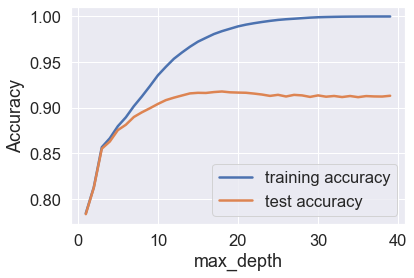

In [83]:
plt.figure()
plt.plot(score["param_max_depth"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_max_depth"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Observation : The optimal max_depth = 10 

#### 4.2 Tuning min_samples_leaf

In [84]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(X_lasso, y_tr_smt)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [85]:
# scores of GridSearch CV
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.24,0.11,0.00,0.00,5,{'min_samples_leaf': 5},0.87,0.91,0.91,0.91,0.92,0.91,0.02,1,0.97,0.96,0.96,0.96,0.96,0.96,0.00
1,1.32,0.19,0.00,0.00,25,{'min_samples_leaf': 25},0.88,0.89,0.90,0.89,0.90,0.90,0.01,2,0.92,0.92,0.92,0.92,0.92,0.92,0.00
2,1.13,0.25,0.01,0.00,45,{'min_samples_leaf': 45},0.88,0.89,0.89,0.89,0.90,0.89,0.01,3,0.90,0.90,0.90,0.91,0.90,0.90,0.00
3,0.83,0.04,0.00,0.00,65,{'min_samples_leaf': 65},0.87,0.89,0.88,0.89,0.89,0.88,0.01,4,0.90,0.90,0.90,0.90,0.89,0.90,0.00
4,0.86,0.09,0.00,0.00,85,{'min_samples_leaf': 85},0.87,0.88,0.88,0.88,0.89,0.88,0.01,5,0.89,0.89,0.89,0.89,0.89,0.89,0.00


#### Plotting the Score using the min_samples_leaf parameter

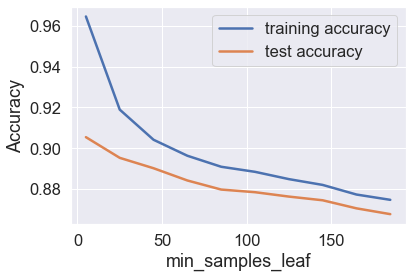

In [86]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(score["param_min_samples_leaf"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_min_samples_leaf"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Observation : Optimal value of min_samples_leaf = 25.

#### 4.3 Tuning min_samples_split

In [87]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(X_lasso, y_tr_smt)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [88]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.58,0.15,0.00,0.00,5,{'min_samples_split': 5},0.88,0.92,0.92,0.92,0.92,0.91,0.02,1,0.99,0.99,0.99,0.99,0.99,0.99,0.00
1,1.25,0.10,0.00,0.00,25,{'min_samples_split': 25},0.87,0.91,0.91,0.91,0.91,0.90,0.02,2,0.96,0.96,0.96,0.96,0.96,0.96,0.00
2,1.23,0.12,0.00,0.00,45,{'min_samples_split': 45},0.86,0.91,0.91,0.90,0.91,0.90,0.02,3,0.95,0.94,0.94,0.95,0.94,0.94,0.00
3,1.29,0.14,0.00,0.00,65,{'min_samples_split': 65},0.87,0.90,0.91,0.90,0.91,0.90,0.02,4,0.94,0.93,0.93,0.93,0.93,0.93,0.00
4,1.21,0.06,0.00,0.00,85,{'min_samples_split': 85},0.86,0.90,0.90,0.90,0.90,0.89,0.02,5,0.93,0.93,0.93,0.93,0.93,0.93,0.00


#### Plotting the Score using the min_sample_split parameter

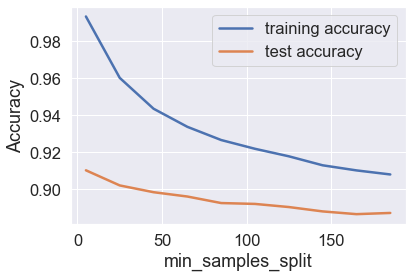

In [89]:
# plotting scores with min_sample_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Observation : Optimal Value of min_sample_split =50.

In [90]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(25, 175, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiating the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1, return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_lasso, y_tr_smt)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.4min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(25, 175, 50),
                         'min_samples_split': range(50, 150, 50)},
             return_train_score=True, verbose=1)

In [91]:
# Cross Validation results : 
cross_v_results = pd.DataFrame(grid_search.cv_results_)
cross_v_results
# printing the optimal accuracy score & hyperparameters
print("Best Accuracy score ", grid_search.best_score_)

Best Accuracy score  0.8960754920211917


In [92]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=25, min_samples_split=50)


In [93]:
# Creating model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=25,
                                  min_samples_split=50)
clf_gini.fit(X_lasso, y_tr_smt)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=25, min_samples_split=50,
                       random_state=100)

In [94]:
# Printing the accuracy scores of the final decision tree after hyperparamter tuninig: 
print ('Accuracy Score for Decision Tree Final Model :',clf_gini.score(X_test,y_test))

Accuracy Score for Decision Tree Final Model : 0.8712365292745251


#### Decision Tree Model Summary: 
- It give the accuracy of 87%.
- Confusion matix shows lot of false positives still exist.

### Model 5.  Random Forest
#### Random Forest with Default Hyperparameters

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rf = RandomForestClassifier()
rf.fit(X_lasso, y_tr_smt)

# Make predictions
prediction_test = rf.predict(X_test)
print ('Accuracy of Random Forest with Default Hyperparamters',metrics.accuracy_score(y_test, prediction_test))

Accuracy of Random Forest with Default Hyperparamters 0.9273414065103878


In [96]:
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      8272
           1       0.54      0.67      0.60       729

    accuracy                           0.93      9001
   macro avg       0.76      0.81      0.78      9001
weighted avg       0.94      0.93      0.93      9001



In [97]:
# Printing confusion matrix
print(confusion_matrix(y_test, prediction_test))

[[7859  413]
 [ 241  488]]


### Hyperparameter Tuning : For increasing the accuracy and recall tuninig the hyperparamters
#### 5.1 Tuning max_depth

In [98]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(X_lasso, y_tr_smt)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='accuracy')

In [99]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.41,0.04,0.07,0.01,2,{'max_depth': 2},0.84,0.84,0.84,0.82,0.85,0.84,0.01,4,0.84,0.84,0.84,0.83,0.84,0.84,0.00
1,6.62,0.26,0.11,0.00,7,{'max_depth': 7},0.89,0.90,0.90,0.90,0.91,0.90,0.01,3,0.91,0.91,0.91,0.91,0.91,0.91,0.00
2,9.93,0.09,0.15,0.00,12,{'max_depth': 12},0.93,0.94,0.94,0.94,0.94,0.94,0.01,2,0.97,0.96,0.96,0.96,0.96,0.96,0.00
3,11.46,0.18,0.20,0.03,17,{'max_depth': 17},0.94,0.96,0.95,0.95,0.96,0.95,0.01,1,0.99,0.99,0.99,0.99,0.99,0.99,0.00


#### Plotting scores with max_depth hyperparameter tuninig


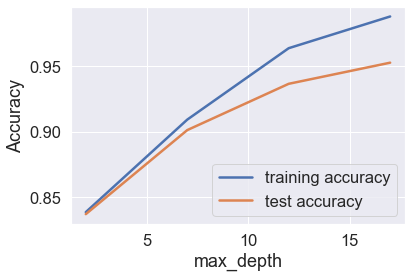

In [100]:
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### 5.2 Tuning n_estimators hyperparamter

In [101]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(X_lasso, y_tr_smt)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'n_estimators': range(100, 1500, 400)},
             return_train_score=True, scoring='accuracy')

#### Plotting the scoreswith n_estimators hyperparamters

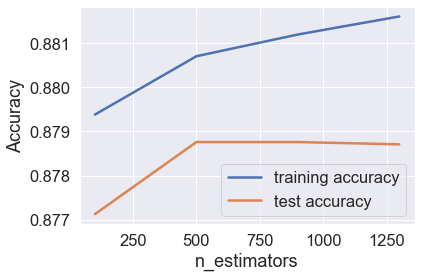

In [102]:
scores = rf.cv_results_

# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### 5.3 Tuning min_samples_leaf hyperparameter

In [ ]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(50, 400, 10)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(X_lasso, y_tr_smt)

#### Plotting the scores with min_samples_leaf hyperparameters

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### 5.4 Tuning min_samples_split hyperparamter

In [ ]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(100, 500, 25)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(X_lasso, y_tr_smt)

#### Plotting the scores with min_samples_split hyperparamter

In [ ]:
scores = rf.cv_results_

# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Grid Search to Find Optimal Hyperparameters for Random Forest Model

In [ ]:
# Based on the results of the optimal values of hyperparameters found by the above hyperparameter tuning, preparing the paramter grid for Final RF model creation
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 300, 100),
    'min_samples_split': range(200, 500, 100),
    'n_estimators': [500,700], 
    'max_features': [10,20,25]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [ ]:
''' Commenting because this code is time consuming
# Fit the grid search to the data
grid_search.fit(X_lasso, y_tr_smt)
# printing the optimal accuracy score & hyperparameters
print('Accuracy of the RF is ',grid_search.best_score_,'using',grid_search.best_params_)
'''

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

model_rf = RandomForestClassifier(bootstrap=True,
                                  max_depth=10,
                                  min_samples_leaf=100, 
                                  min_samples_split=200,
                                  n_estimators=1000 ,
                                  oob_score = True, n_jobs = -1,
                                  random_state =50,
                                  max_features = 15,
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)

In [ ]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,prediction_test))
print(confusion_matrix(y_test,prediction_test))

In [ ]:
# accuracy score
print ('Accuracy Score for Random Forest Final Model after hyperparamter tuning :',metrics.accuracy_score(y_test, prediction_test))

In [ ]:
X = df
# Scaling all the variables to a range of 0 to 1
#from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
X = pd.DataFrame(scaler.transform(X))
X.columns = features

imp_features = model_rf.feature_importances_
wts = pd.Series(imp_features,
                 index=X.columns.values)
wts.sort_values()[-10:].plot(kind = 'barh')

#### Overall Observations based on various models created :

    1. From the Random Forest Model, it can be understood that the important features to decide the churn are:
        - Average Revenue per user for month 8.
        - Max recharge amount for month 8.
        - Local Incoming calls for month 8.
        
    2. The results from Logistic regression, Random Forest and EDA are similar as per expectations. 


## 6. Summary 

    1. Around 8% of the High Value customers churn. 
    2. It was observed that increase in tenure on the network (Age on Network) leads to retention of the client.
    3. Most of the churn is happening for customers with tenure between 6months and 5 years.
    4. There is not churn observed for customers with tenure <6 months and > 5 years.
    5. Maximum churn oberserved is for customers with tenure from  1 to  2 years.
    6. Strong churn predictors: 
        - ARPU for August
        - Max recharge amount for August
        - Local Incoming calls for August
        - Local Outgoing Calls for August
        - Std Outgoing Calls for August
    7. Max Recharge Amount is an important churn indicator.
    8. Random Forest is found to be performing best in this case study , followed by SVM and Logistic Regression.
 

## 7. Recommendations

    1. Closely monitor service usage during 'Action month' using Good phase as baseline.
    2. Roll out special offers to High Value Customers , particularly whose usage on the following parameteres have significantly dropped 'action phase' when compared to 'Good Phase':
        - ARPU
        - Max recharge amount
        - Local Incoming calls
        - Local Outgoing Calls
        - Std Outgoing Calls
    
    